<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PHBS-FinLab-API" data-toc-modified-id="PHBS-FinLab-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PHBS FinLab API</a></span></li><li><span><a href="#Profile-of-Chinese-Listed-Family-Firm-(FamFirm_FamFInfo)" data-toc-modified-id="Profile-of-Chinese-Listed-Family-Firm-(FamFirm_FamFInfo)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Profile of Chinese Listed Family Firm (FamFirm_FamFInfo)</a></span></li><li><span><a href="#Structure-of-Family-Members" data-toc-modified-id="Structure-of-Family-Members-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Structure of Family Members</a></span></li><li><span><a href="#中国A股质押日交易明细" data-toc-modified-id="中国A股质押日交易明细-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>中国A股质押日交易明细</a></span><ul class="toc-item"><li><span><a href="#日股本" data-toc-modified-id="日股本-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>日股本</a></span></li></ul></li><li><span><a href="#中国A股股权冻结质押情况(报告期)" data-toc-modified-id="中国A股股权冻结质押情况(报告期)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>中国A股股权冻结质押情况(报告期)</a></span></li><li><span><a href="#中国A股股权质押信息" data-toc-modified-id="中国A股股权质押信息-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>中国A股股权质押信息</a></span></li><li><span><a href="#股东股权质押情况明细表-Pled_TrdDetl" data-toc-modified-id="股东股权质押情况明细表-Pled_TrdDetl-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>股东股权质押情况明细表 Pled_TrdDetl</a></span></li><li><span><a href="#股东股权质押统计表-Pled_TrdStat" data-toc-modified-id="股东股权质押统计表-Pled_TrdStat-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>股东股权质押统计表 Pled_TrdStat</a></span></li></ul></div>

## PHBS FinLab API

In [71]:
import cx_Oracle
import os
import configparser
import pandas as pd
import sqlalchemy as sa
from sqlalchemy.ext.declarative import declarative_base
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [6]:
# 载入database.ini文件
def read_db_config(ini_file='../../../PHBS/Finlab/pythonConnectSQL/sample_database.ini', section='WIND'):
    if not os.path.exists(ini_file):
        raise IOError('No such file[%s]' %config_file)
    config = configparser.ConfigParser()
    config.read(ini_file, encoding='utf-8')
    db_config = {}
    if section in config.sections():
        db_config = dict(config._sections[section])
    else:
        print('No section:' + section)
    return db_config
config = read_db_config()
# PHBS FinLab API
cx_Oracle.init_oracle_client(lib_dir="../../../PHBS/Finlab/instantclient_21_3/")
eng = sa.create_engine(('{dbtype}://{user}:{password}@{host}:{port}/{sid}').format(**config))

## Profile of Chinese Listed Family Firm (FamFirm_FamFInfo)

In [173]:
FAprof_df = pd.read_csv("../../Audit/Family Firm/FamFirm_FamFInfo.csv")
FAprof_df.rename(columns={'Symbol':'Stkcd','EndDate':'Accper'}, inplace=True)
FAprof_df.sort_values(by=["Stkcd", "Accper"], inplace=True)
FAprof_df.drop(columns=['ShortName_EN'], inplace=True)
FAprof_df.reset_index(drop=True, inplace=True)
FAprof_df

,Stkcd,Accper,FamEntyp,ListedDate,ESTABLISHDATE,CoFullName_EN,ExchangeCode,ExchangeName_EN,ListingBoardCode,ListingBoard_EN,IndustryCode,IndustryName_EN,RegisterAddress_EN,Area_EN,ProvinceName_EN,City_EN,FamStyle,FamTime,Founder_EN,ActualController_EN,ActualControllerID,FamNameStatus,ChairmanID,Chairman_EN,IsChairmFamMember,ChairmanSerStartDate,ChairmanSerEndDate,AsChairmanPattern,GeneralManagerID,GeneralManager_EN,IsGeneralManaMember,GManSerStartDate,GManSerEndDate,AsGManPattern,ConcurrentPosition,ManagementGenerations,ContrshrName_EN,ContrshrProportion,IsTop2Shareholder,ShareholderSec_EN,ShareholderSecNature_EN,ShareholderSecProp,IsRelatedTrading,Preshnum,PreshProp,Hdirnum,HdirProp,InsInvestorProp,StatesharesProp,ForeignInvestorProp,BalanceIndicators,TotalNumSectoFifth,ShareholderFirstProp,ControlProportion,OwnershipProportion,SeparationRate
0,1,2004-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"David Bonderman, James G. Coulter, William S. ...","30406931,30406932,30406933,30406935",5,3074330.0,Lan Dezhang,0,2004-12-14,2005-05-16,0.0,30159858.0,Wei Jiefu,0,2004-12-14,2006-02-11,0.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,27.8712,3.20,17.89,0.3924,7.02,17.89,NaN,NaN,NaN
1,1,2005-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"James G. Coulter, William S. Price III, Richar...","30406932,30406933,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,30159858.0,Wei Jiefu,0,2004-12-14,2006-02-11,0.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,29.1462,3.20,17.89,0.3930,7.03,17.89,NaN,NaN,NaN
2,1,2006-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"James G. Coulter, William S. Price III, Richar...","30406932,30406933,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3027280.0,Frank N. Newman,0,2005-06-17,2010-06-29,NaN,1.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,38.0101,3.20,17.89,0.4108,7.35,17.89,NaN,NaN,NaN
3,1,2007-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"James G. Coulter, Richard C. Blum, David Bonde...","30406932,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3068634.0,Xiao Suining,0,2007-05-10,2010-10-13,1.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",16.7,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,16.70,1,0.0,0.0,0.0,0.0,61.7833,2.99,16.70,0.4760,7.95,16.70,NaN,NaN,NaN
4,1,2008-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"James G. Coulter, Richard C. Blum, David Bonde...","30406932,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3068634.0,Xiao Suining,0,2007-05-10,2010-10-13,1.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",16.76,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,16.76,1,NaN,NaN,NaN,NaN,56.8585,NaN,16.76,0.7172,12.02,16.76,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...

## Structure of Family Members

In [170]:
FAstru_df = pd.read_csv("../../Audit/Family Firm/FamFirm_Structure.csv")
FAstru_df.rename(columns={'Symbol':'Stkcd','EndDate':'Accper'}, inplace=True)
FAstru_df.sort_values(by=["Stkcd", "Accper"], inplace=True)
FAstru_df.drop(columns=['ShortName_EN'], inplace=True)
FAstru_df.reset_index(drop=True, inplace=True)
FAstru_df

,Stkcd,Accper,FamEntyp,SumSalary,SumSalary_FamName,SumNumber,SumNumber_FamN,FamNumber_Exe,TotalNumber,TotalNumber_FamN,FamRatio_Exe,DirNumber,IndDirectNumber,IndDirectNumber_FamN,FamDirNumberRatio,SupervisBoardNumber,SupBoardNum_FamN,FamSupBoardRatio,ManageNumber,ManageNumber_FamN,FamNumberRatio,ChildrenNum,SonNum,DauNum
0,4,2019-12-31,3,1190900.0,335800.0,251.0,2,1,13.0,1,0.0769,9.0,3.0,1,0.1111,3.0,0,0.0000,5.0,1,0.2000,0,0,0
1,7,2008-12-31,3,2011000.0,760000.0,849.0,3,2,NaN,3,NaN,9.0,3.0,2,0.2222,3.0,1,0.3333,4.0,0,0.0000,2,0,2
2,7,2009-12-31,3,2082000.0,760000.0,799.0,3,2,NaN,3,NaN,9.0,3.0,2,0.2222,3.0,1,0.3333,4.0,0,0.0000,2,0,2
3,7,2010-12-31,3,2542000.0,760000.0,751.0,3,2,NaN,3,NaN,9.0,3.0,2,0.2222,3.0,1,0.3333,5.0,0,0.0000,2,0,2
4,7,2011-12-31,3,2587200.0,760000.0,675.0,3,2,NaN,3,NaN,9.0,3.0,2,0.2222,3.0,1,0.3333,5.0,0,0.0000,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11735,900950,2010-12-31,3,14835200.0,2825200.0,2437.0,1,1,NaN,1,NaN,9.0,3.0,1,0.1111,3.0,0,0.0000,10.0,0,0.0000,1,1,0
11736,900950,2011-12-31,3,20700000.0,3500000.0,2823.0,2,1,NaN,2,NaN,9.0,3.0,1,0.1111,3.0,0,0.0000,12.0,1,0.0833,1,1,0
11737,900950,2012-12-31,3,23200000.0,4500000.0,823.0,2,1,20.0,2,0.1000,9.0,3.0,1,0.1111,3.0,0,0.0000,12.0,1,0.0833,1,1,0
11738,900950,2013-12-31,3,30700000.0,9500000.0,1026.0,2,2,19.0,2,0.1053,9.0,3.0,2,0.2222,3.0,0,0.0000,10.0,1,0.1000,1,1,0


In [177]:
FA_df = pd.merge(FAprof_df, FAstru_df,  on=['Accper','Stkcd', 'FamEntyp'], how='left')

In [179]:
FA_df

,Stkcd,Accper,FamEntyp,ListedDate,ESTABLISHDATE,CoFullName_EN,ExchangeCode,ExchangeName_EN,ListingBoardCode,ListingBoard_EN,IndustryCode,IndustryName_EN,RegisterAddress_EN,Area_EN,ProvinceName_EN,City_EN,FamStyle,FamTime,Founder_EN,ActualController_EN,ActualControllerID,FamNameStatus,ChairmanID,Chairman_EN,IsChairmFamMember,ChairmanSerStartDate,ChairmanSerEndDate,AsChairmanPattern,GeneralManagerID,GeneralManager_EN,IsGeneralManaMember,GManSerStartDate,GManSerEndDate,AsGManPattern,ConcurrentPosition,ManagementGenerations,ContrshrName_EN,ContrshrProportion,IsTop2Shareholder,ShareholderSec_EN,ShareholderSecNature_EN,ShareholderSecProp,IsRelatedTrading,Preshnum,PreshProp,Hdirnum,HdirProp,InsInvestorProp,StatesharesProp,ForeignInvestorProp,BalanceIndicators,TotalNumSectoFifth,ShareholderFirstProp,ControlProportion,OwnershipProportion,SeparationRate,SumSalary,SumSalary_FamName,SumNumber,SumNumber_FamN,FamNumber_Exe,TotalNumber,TotalNumber_FamN,FamRatio_Exe,DirNumber,IndDirectNumber,IndDirectNumber_FamN,FamDirNumberRatio,SupervisBoardNumber,SupBoardNum_FamN,FamSupBoardRatio,ManageNumber,ManageNumber_FamN,FamNumberRatio,ChildrenNum,SonNum,DauNum
0,1,2004-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"David Bonderman, James G. Coulter, William S. ...","30406931,30406932,30406933,30406935",5,3074330.0,Lan Dezhang,0,2004-12-14,2005-05-16,0.0,30159858.0,Wei Jiefu,0,2004-12-14,2006-02-11,0.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,27.8712,3.20,17.89,0.3924,7.02,17.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2005-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"James G. Coulter, William S. Price III, Richar...","30406932,30406933,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,30159858.0,Wei Jiefu,0,2004-12-14,2006-02-11,0.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,29.1462,3.20,17.89,0.3930,7.03,17.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2006-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"James G. Coulter, William S. Price III, Richar...","30406932,30406933,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3027280.0,Frank N. Newman,0,2005-06-17,2010-06-29,NaN,1.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,38.0101,3.20,17.89,0.4108,7.35,17.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2007-12-31,2,1991-04-03,1987-12-22,"Shenzhen Development Bank Co., Ltd.",SZSE,Shenzhen Stock Exchange,P3401,Main Board,J66,Monetary financial service,Guangdong (province) Shenzhen (city),South China,Guangdong (province),Shenzhen (city),2.0,2004-12-30,NaN,"James G. Coulter, Richard C. Blum, David Bonde...","30406932,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3068634.0,Xiao Suining,0,2007-05-10,2010-10-13,1.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",16.7,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,16.70,1,0.0,0.0,0.0,0.0,61.7833,2.99,16.70,0.4760,7.95,16.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2008-12-31,2,1991-0

In [180]:
FA_df.drop(columns=['CoFullName_EN', 'ExchangeCode', 'ExchangeName_EN', 'ListingBoard_EN', 'RegisterAddress_EN', 
                   'Area_EN', 'ProvinceName_EN', 'City_EN'], inplace=True)

In [181]:
FA_df

,Stkcd,Accper,FamEntyp,ListedDate,ESTABLISHDATE,ListingBoardCode,IndustryCode,IndustryName_EN,FamStyle,FamTime,Founder_EN,ActualController_EN,ActualControllerID,FamNameStatus,ChairmanID,Chairman_EN,IsChairmFamMember,ChairmanSerStartDate,ChairmanSerEndDate,AsChairmanPattern,GeneralManagerID,GeneralManager_EN,IsGeneralManaMember,GManSerStartDate,GManSerEndDate,AsGManPattern,ConcurrentPosition,ManagementGenerations,ContrshrName_EN,ContrshrProportion,IsTop2Shareholder,ShareholderSec_EN,ShareholderSecNature_EN,ShareholderSecProp,IsRelatedTrading,Preshnum,PreshProp,Hdirnum,HdirProp,InsInvestorProp,StatesharesProp,ForeignInvestorProp,BalanceIndicators,TotalNumSectoFifth,ShareholderFirstProp,ControlProportion,OwnershipProportion,SeparationRate,SumSalary,SumSalary_FamName,SumNumber,SumNumber_FamN,FamNumber_Exe,TotalNumber,TotalNumber_FamN,FamRatio_Exe,DirNumber,IndDirectNumber,IndDirectNumber_FamN,FamDirNumberRatio,SupervisBoardNumber,SupBoardNum_FamN,FamSupBoardRatio,ManageNumber,ManageNumber_FamN,FamNumberRatio,ChildrenNum,SonNum,DauNum
0,1,2004-12-31,2,1991-04-03,1987-12-22,P3401,J66,Monetary financial service,2.0,2004-12-30,NaN,"David Bonderman, James G. Coulter, William S. ...","30406931,30406932,30406933,30406935",5,3074330.0,Lan Dezhang,0,2004-12-14,2005-05-16,0.0,30159858.0,Wei Jiefu,0,2004-12-14,2006-02-11,0.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,27.8712,3.20,17.89,0.3924,7.02,17.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2005-12-31,2,1991-04-03,1987-12-22,P3401,J66,Monetary financial service,2.0,2004-12-30,NaN,"James G. Coulter, William S. Price III, Richar...","30406932,30406933,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,30159858.0,Wei Jiefu,0,2004-12-14,2006-02-11,0.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,29.1462,3.20,17.89,0.3930,7.03,17.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2006-12-31,2,1991-04-03,1987-12-22,P3401,J66,Monetary financial service,2.0,2004-12-30,NaN,"James G. Coulter, William S. Price III, Richar...","30406932,30406933,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3027280.0,Frank N. Newman,0,2005-06-17,2010-06-29,NaN,1.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",17.89,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,17.89,1,0.0,0.0,0.0,0.0,38.0101,3.20,17.89,0.4108,7.35,17.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2007-12-31,2,1991-04-03,1987-12-22,P3401,J66,Monetary financial service,2.0,2004-12-30,NaN,"James G. Coulter, Richard C. Blum, David Bonde...","30406932,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3068634.0,Xiao Suining,0,2007-05-10,2010-10-13,1.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",16.7,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,16.70,1,0.0,0.0,0.0,0.0,61.7833,2.99,16.70,0.4760,7.95,16.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2008-12-31,2,1991-04-03,1987-12-22,P3401,J66,Monetary financial service,2.0,2004-12-30,NaN,"James G. Coulter, Richard C. Blum, David Bonde...","30406932,30406935,30406931",5,3027280.0,Frank N. Newman,0,2005-06-17,2010-05-25,1.0,3068634.0,Xiao Suining,0,2007-05-10,2010-10-13,1.0,0.0,NaN,"Newbridge Asia AIV Ⅲ, L.P.",16.76,1,"Newbridge Asia AIVIII, L.P.",Foreign Legal Person,16.76,1,NaN,NaN,NaN,NaN,56.8585,NaN,16.76,0.7172,12.02,16.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## 中国A股质押日交易明细

In [7]:
query = "SELECT * FROM FILESYNC.ASharePledgetrade"
ASharePledgetrade_df = pd.read_sql(query,eng)

In [10]:
ASharePledgetrade_df.drop(columns=['object_id', 'opdate', 'opmode'],inplace=True)
ASharePledgetrade_df.sort_values(by=['trade_dt', 's_info_windcode'],inplace=True)
ASharePledgetrade_df.reset_index(drop=True, inplace=True)
ASharePledgetrade_df['trade_dt'] = pd.to_datetime(ASharePledgetrade_df['trade_dt'])

In [12]:
ASharePledgetrade_df.to_feather('ASharePledgetrade_df.feather')

In [13]:
ASharePledgetrade_df

,s_info_windcode,trade_dt,initial_num,repurchase_num,repurchase_allowance,repurchase_allowance1,repurchase_allowance2
0,002435.SZ,2014-03-21,0.0,0.0,3093750.0,NaN,NaN
1,600680.SH,2014-03-21,0.0,0.0,35000.0,NaN,NaN
2,002435.SZ,2014-03-24,0.0,0.0,3093750.0,NaN,NaN
3,600680.SH,2014-03-24,0.0,0.0,35000.0,NaN,NaN
4,002435.SZ,2014-03-25,0.0,0.0,3093750.0,NaN,NaN
...,...,...,...,...,...,...,...
2457787,605199.SH,2021-11-26,0.0,0.0,23800000.0,NaN,NaN
2457788,605358.SH,2021-11-26,0.0,0.0,1500000.0,NaN,NaN
2457789,605368.SH,2021-11-26,0.0,0.0,3780000.0,NaN,NaN
2457790,605377.SH,2021-11-26,0.0,0.0,5600000.0,NaN,NaN


**Wind数据有问题**

年份分配的问题，18之后的数据是正常的，但是前面的有问题，API调出来的18年前的数据类似于样例数据

In [84]:
ASharePledgetrade_df.iloc[1200000]

s_info_windcode                    600172.SH
trade_dt                 2019-06-25 00:00:00
initial_num                              0.0
repurchase_num                           0.0
repurchase_allowance             178178042.0
repurchase_allowance1                    NaN
repurchase_allowance2                    NaN
Name: 1200000, dtype: object

### 日股本

In [14]:
query = 'SELECT S_INFO_WINDCODE, TRADE_DT, TOT_SHR_TODAY FROM FILESYNC.AShareEODDerivativeIndicator WHERE TRADE_DT+0 > 20131231'
AShareEODDerivativeIndicator_df = pd.read_sql(query, eng)

In [109]:
AShareEODDerivativeIndicator_df.rename(columns={'trade_dt':'price_date'},inplace=True)

In [15]:
AShareEODDerivativeIndicator_df.sort_values(by=['trade_dt', 's_info_windcode'],inplace=True)
AShareEODDerivativeIndicator_df.reset_index(drop=True, inplace=True)
AShareEODDerivativeIndicator_df['trade_dt'] = pd.to_datetime(AShareEODDerivativeIndicator_df['trade_dt'])

In [17]:
AShareEODDerivativeIndicator_df.to_feather('AShareEODDerivativeIndicator_df.feather')

In [91]:
ASharePledge_df = pd.merge(ASharePledgetrade_df, AShareEODDerivativeIndicator_df, on=['s_info_windcode','trade_dt'], how='left')
ASharePledge_df['pledge_ratio'] = round(ASharePledge_df['repurchase_allowance']/ASharePledge_df['tot_shr_today']/100,2)

In [18]:
ASharePledge_df.to_feather('ASharePledge_df.feather')

In [46]:
ASharePledgecount_df = ASharePledge_df.groupby(by='trade_dt').sum().rolling(5).mean()

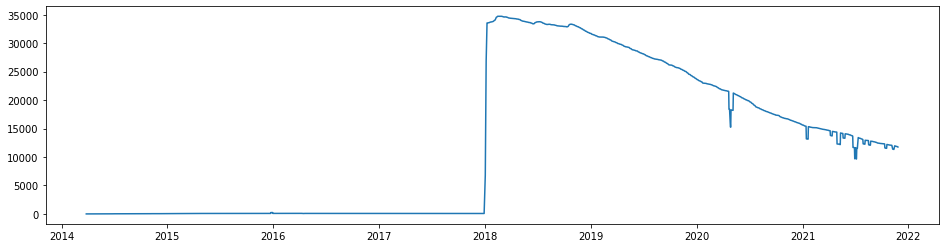

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(ASharePledgecount_df.index, ASharePledgecount_df['pledge_ratio'])

只有18年之后的数据

In [34]:
ASharePledgemean_df = ASharePledge_df.groupby(by='trade_dt').mean().rolling(5).mean()

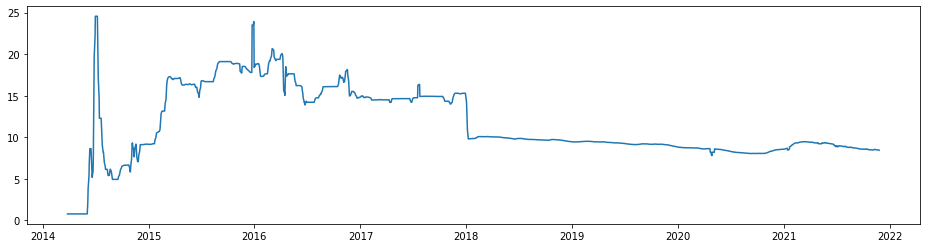

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(ASharePledgemean_df.index, ASharePledgemean_df['pledge_ratio'])

18年之后才开始平缓，这是整个wind的问题

In [38]:
ASharePledgemean_df = ASharePledge_df.groupby(by='trade_dt').mean().rolling(5).std()

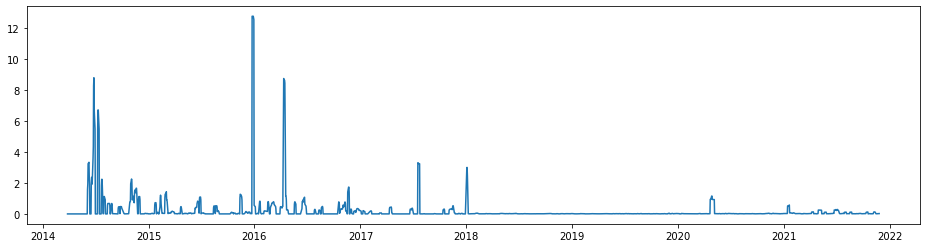

In [39]:
# pledge ratio standard deviation 
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(ASharePledgemean_df.index, ASharePledgemean_df['pledge_ratio'])

## 中国A股股权冻结质押情况(报告期)

|                   字段中文名    |                         字段名          |                     字段类型     |
|:-------------------------------:|:---------------------------------------:|:--------------------------------:|
|                对象ID           |                       OBJECT_ID         |                 VARCHAR2(100)    |
|               Wind代码          |                    S_INFO_WINDCODE      |                  VARCHAR2(40)    |
|                公司ID           |                    S_INFO_COMPCODE      |                  VARCHAR2(10)    |
|                报告期           |                      PRICE_DATE         |                  VARCHAR2(8)     |
|               公告日期          |                      F_NAV_UNIT         |                  VARCHAR2(8)     |
|               股东名称          |                   F_NAV_ACCUMULATED     |                 VARCHAR2(200)    |
|          质押或冻结数量(股)     |                 F_NAV_DIVACCUMULATED    |                  NUMBER(20,4)    |
|             持股数量(股)        |                    F_NAV_ADJFACTOR      |                  NUMBER(20,4)    |
|            质押冻结比例(%)      |                      CRNCY_CODE         |                  NUMBER(20,4)    |
|                 备注            |                    F_NAV_ADJUSTED       |                 VARCHAR2(400)    |
|             质押股份数量        |                    S_PLEDGE_SHARES      |                  NUMBER(20,4)    |
|             冻结股份数量        |                     S_FRO_SHARES        |                  NUMBER(20,4)    |
|                股东ID           |                     S_HOLDER_CODE       |                  VARCHAR2(10)    |

In [19]:
query = "SELECT * FROM FILESYNC.AEquFroPleInfoRepperend"
AEquFroPleInfoRepperend_df = pd.read_sql(query, eng)

In [20]:
AEquFroPleInfoRepperend_df.drop(columns=['object_id', 'f_nav_accumulated', 'opdate', 'opmode'], inplace=True)
AEquFroPleInfoRepperend_df.sort_values(by=['price_date','s_info_windcode'],inplace=True)
AEquFroPleInfoRepperend_df.reset_index(drop=True, inplace=True)
AEquFroPleInfoRepperend_df['price_date'] = pd.to_datetime(AEquFroPleInfoRepperend_df['price_date'])

In [22]:
AEquFroPleInfoRepperend_df.to_feather("AEquFroPleInfoRepperend_df.feather")

In [111]:
AEquFroPleInfoRepperend_df

,s_info_windcode,s_info_compcode,price_date,f_nav_unit,f_nav_divaccumulated,f_nav_adjfactor,crncy_code,f_nav_adjusted,s_pledge_shares,s_fro_shares,s_holder_code,pledge_ratio
0,001267.SZ,1000765,20041231,20050430,4704000.0,4704000.0,100.00,None,NaN,NaN,2010218,NaN
1,001267.SZ,1000765,20041231,20050430,91451405.0,91451405.0,100.00,None,NaN,NaN,2016157,NaN
2,600108.SH,1600108,20041231,20050422,76500000.0,77844780.0,98.27,None,NaN,NaN,0SCDBC7460,NaN
3,600141.SH,1600141,20041231,20050330,15000000.0,15000000.0,100.00,None,NaN,NaN,0M856ECB08,NaN
4,600234.SH,1600234,20041231,20050430,27219400.0,27219400.0,100.00,None,NaN,NaN,0SI4DEC852,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
173885,834415.BJ,0105565010,20210930,20211029,NaN,9891882.0,NaN,None,5067568.0,0.0,E09F0F,0.512296
173886,834415.BJ,0105565010,20210930,20211029,NaN,22854384.0,NaN,None,4260000.0,0.0,YrplLNOdZq,0.186397
173887,835185.BJ,3AA518F850,20210930,20211026,NaN,12424261.0,NaN,None,3000000.0,0.0,DE7CA5,0.241463
173888,836263.BJ,CAC91E,20210930,20211030,NaN,10332000.0,NaN,None,8700000.0,0.0,Frgwv0UFoc,0.842044


In [114]:
AEquFroPleInfoRepperend_df = pd.merge(AEquFroPleInfoRepperend_df, AShareEODDerivativeIndicator_df, on=['s_info_windcode','price_date'], how='left')

In [140]:
# 每个股东的抵押占总股本比例
AEquFroPleInfoRepperend_df['pledge_ratio'] = round(AEquFroPleInfoRepperend_df['s_pledge_shares']/AEquFroPleInfoRepperend_df['tot_shr_today']/100,2)
AEquFroPleInfoRepperendsum_df = AEquFroPleInfoRepperend_df.groupby(by=['price_date', 's_info_windcode']).sum()

In [135]:
AEquFroPleInfoRepperendsum_df.reset_index(level=1 ,inplace=True)

In [148]:
AEquFroPleInfoRepperendsum_df.query('price_date == "2018-09-30"')

f_nav_divaccumulated  f_nav_adjfactor  crncy_code  \
price_date s_info_windcode                                                      
2018-09-30 000002.SZ                 902252749.0     9.260705e+08     97.4300   
           000004.SZ                   8397600.0     8.397600e+06    100.0000   
           000005.SZ                 262699017.0     2.634754e+08    489.4000   
           000007.SZ                  75000127.0     7.500013e+07    100.0000   
           000008.SZ                 306336548.0     3.986369e+08    226.2700   
...                                          ...              ...         ...   
           603991.SH                  30000000.0     3.345608e+07     89.6698   
           603993.SH                  65336900.0     5.333220e+09      1.2300   
           603996.SH                 182490000.0     1.978210e+08    273.9900   
           603997.SH                 366750710.0     4.590000e+08    147.0200   
           603998.SH                 151920878.0     1.879789e+08    176.9800   

                            s_pledge_shares  s_fro_shares  pledge_ratio  \
price_date s_info_windcode                                                
2018-09-30 000002.SZ                    0.0           0.0           0.0   
           000004.SZ              8397600.0           0.0          10.0   
           000005.SZ                    0.0           0.0           0.0   
           000007.SZ                    0.0           0.0           0.0   
           000008.SZ                    0.0           0.0           0.0   
...                                     ...           ...           ...   
           603991.SH                    0.0           0.0           0.0   
           603993.SH                    0.0           0.0           0.0   
           603996.SH                    0.0           0.0           0.0   
           603997.SH                    0.0           0.0           0.0   
           603998.SH                    0.0           0.0           0.0   

                            tot_shr_today  
price_date s_info_windcode                 
2018-09-30 000002.SZ         1.103915e+06  
           000004.SZ         8.397668e+03  
           000005.SZ         5.292684e+05  
           000007.SZ         3.464480e+04  
           000008.SZ         8.454989e+05  
...                                   ...  
           603991.SH         7.453500e+03  
           603993.SH         2.159924e+06  
           603996.SH         9.004500e+04  
           603997.SH         1.275438e+05  
           603998.SH         8.571254e+04  

[2583 rows x 7 columns]

In [142]:
AEquFroPleInfoRepperendmean_df = AEquFroPleInfoRepperendsum_df.groupby(by='price_date').mean()

In [143]:
AEquFroPleInfoRepperendmean_df

,f_nav_divaccumulated,f_nav_adjfactor,crncy_code,s_pledge_shares,s_fro_shares,pledge_ratio,tot_shr_today
price_date,,,,,,,
2004-12-31,3.924917e+07,3.947331e+07,116.378333,0.000000e+00,0.000000e+00,0.000000,0.000000
2005-06-30,4.009349e+07,4.028560e+07,114.038571,0.000000e+00,0.000000e+00,0.000000,0.000000
2005-12-31,4.621413e+07,4.643826e+07,116.378333,0.000000e+00,0.000000e+00,0.000000,0.000000
2006-06-30,4.347692e+07,4.366903e+07,114.038571,0.000000e+00,0.000000e+00,0.000000,0.000000
2006-12-31,4.050497e+07,4.366903e+07,103.720000,0.000000e+00,0.000000e+00,0.000000,0.000000
2007-06-30,8.065566e+07,9.837566e+07,109.184286,0.000000e+00,0.000000e+00,0.000000,0.000000
2007-12-31,3.526129e+07,6.073906e+07,86.712857,0.000000e+00,0.000000e+00,0.000000,0.000000
2008-06-30,2.992759e+07,5.391569e+07,80.994286,0.000000e+00,0.000000e+00,0.000000,0.000000
2008-12-31,4.599219e+07,7.181300e+07,81.263050,0.000000e+00,0.000000e+00,0.000000,0.000000


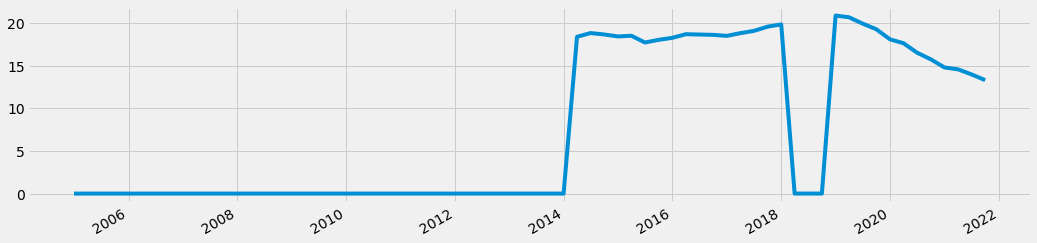

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(AEquFroPleInfoRepperendmean_df.index, AEquFroPleInfoRepperendmean_df['pledge_ratio'])
fig.autofmt_xdate()

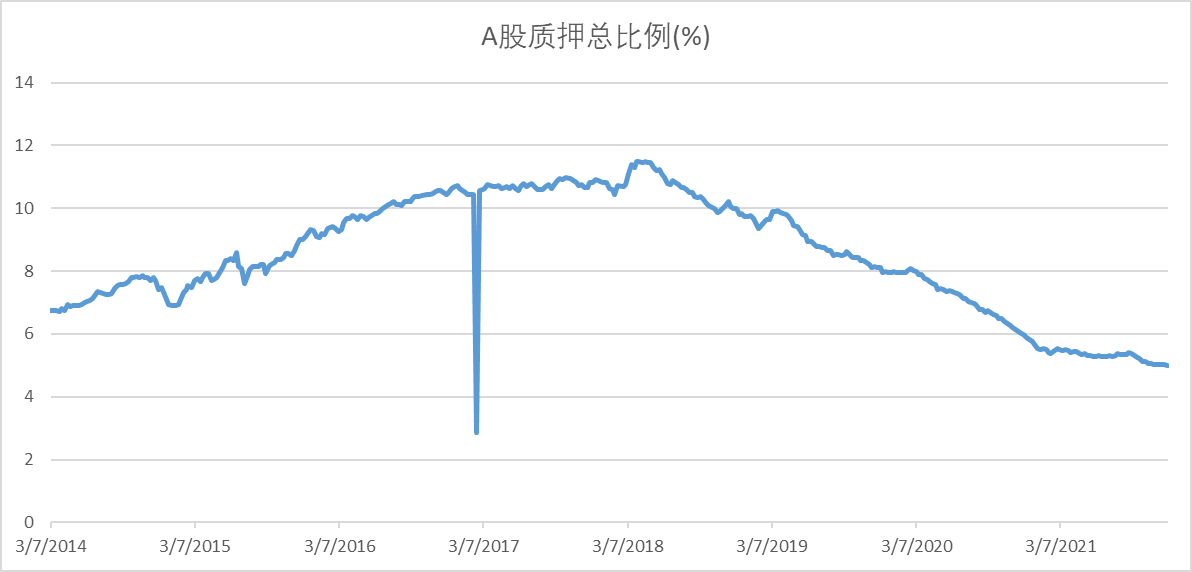

18年年初的质押新规发布，政策收紧，质押减少

18年年底纾困，质押放松，质押又回来了

上图的计算是方式是企业质押率的均值

下面的计算标准是total pledged shares/total shares，两图比较而言，所以小企业的质押情况更严重

上图的大问题：wind18年的数据质量，已经用了定期报告数据，按理来说不会有问题，这已经是最不会出错的数据了

下图的问题：17年的尖刺无法解释

现在拿不到可信的个股周度质押数据，wind直接提取机子会炸，因为大概是1.8M条，没有能用的数据接口，excel直接调完全卡死

CSMAR和RESSET的质押条目对不上，RESSET的条目是113,204条，这个包含了冻结的情况（冻结多是那种质押品市值下跌但不补充质押品的，涉及到诉讼了已经）

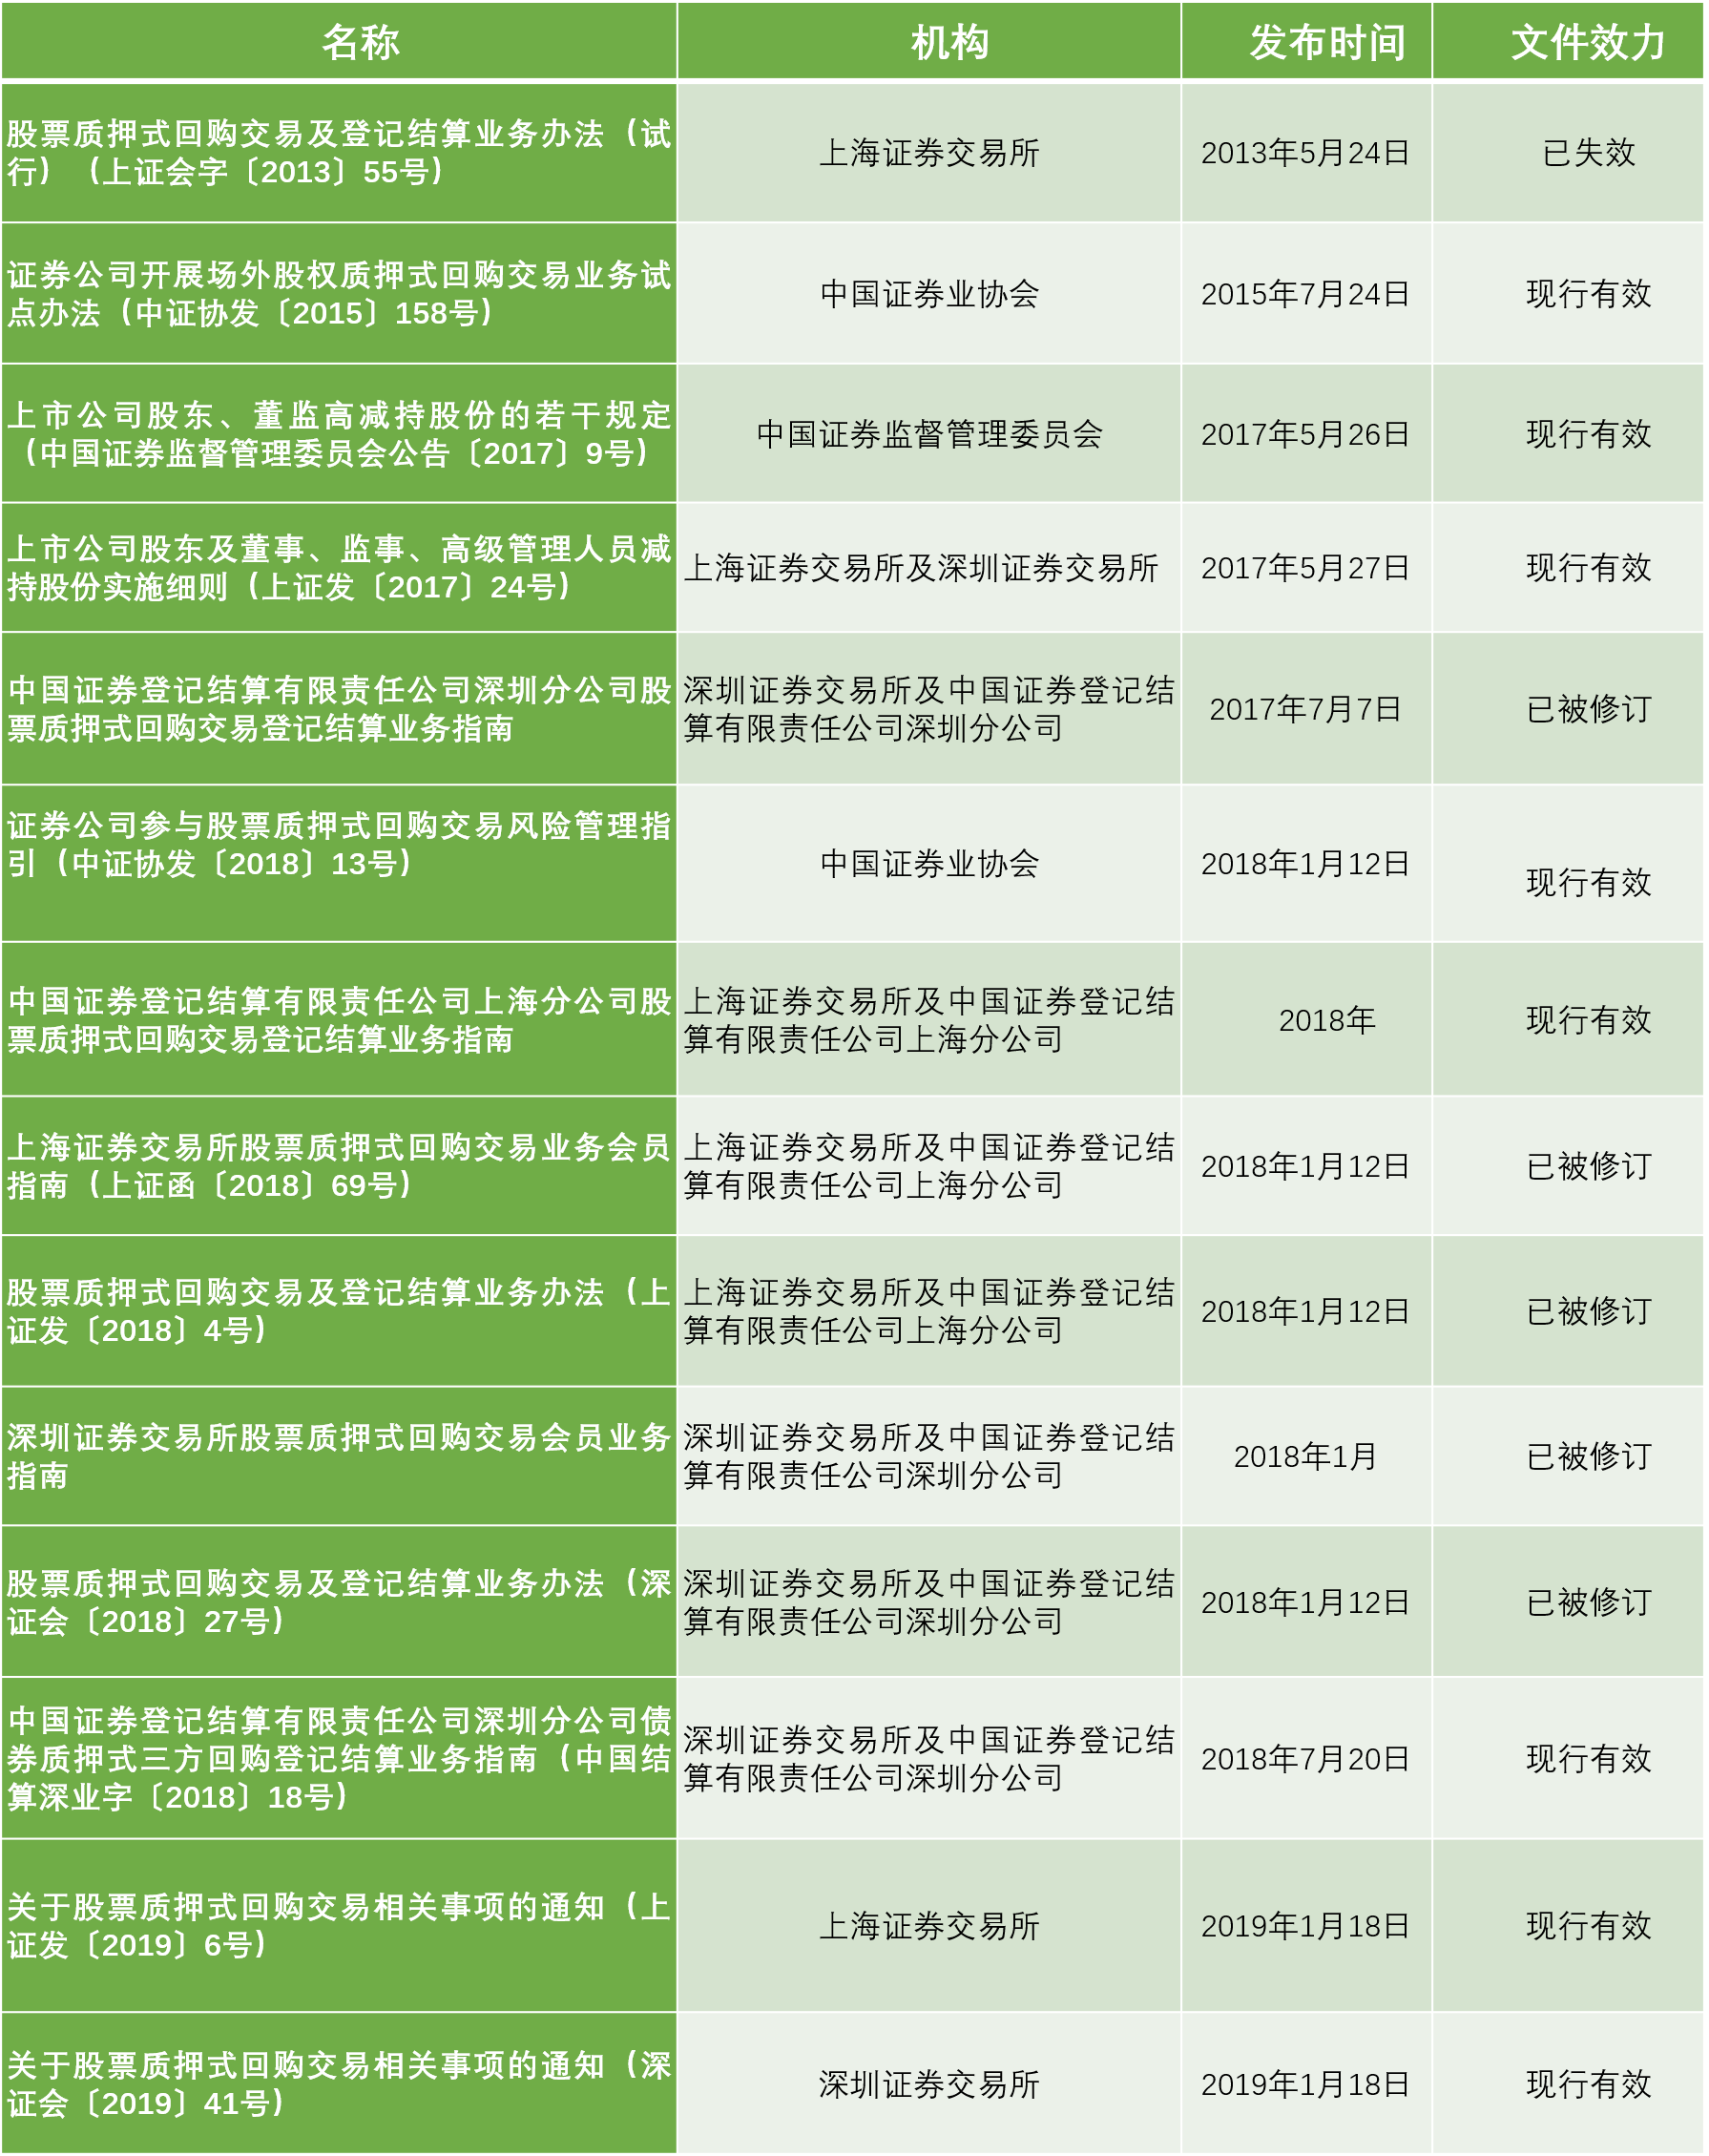

In [188]:
AEquFroPleInfoRepperend_df.rename(columns={'s_info_windcode':'Stkcd','price_date':'Accper'},inplace=True)

In [236]:
FApledge_df = pd.merge(AEquFroPleInfoRepperend_df, FA_df, on=['Stkcd','Accper'], how='left')

In [199]:
AEquFroPleInfoRepperend_df['Stkcd'] = AEquFroPleInfoRepperend_df['Stkcd'].apply(lambda x : int(x[0:6]))
FA_df['Accper'] = pd.to_datetime(FA_df['Accper'])

1: Single natural person entrepreneur firm: The actual controller is individual and has no kinsfolks holding shares or serving as directors, supervisors and senior management in the listed firm or controlling shareholding company.

2: Multiple natural persons entrepreneur firm: The actual controller is multiple natural persons and none of them has kinships; meanwhile none of their kinfolks holds shares or serves as directors, supervisors and senior management in the listed firm or controlling shareholding company.

3: Multiple persons family firm: Besides the actual controller, at least one of the family members holds shares, manages or takes charge of the listed firm or controlling shareholding company; (when the kinfolks only hold shares or serve as directors, supervisors and senior management in the controlling shareholding company, the actual controller must take charge of the listed firm)

In [245]:
FApledge0_df = FApledge_df.groupby(by=['Accper','Stkcd']).mean()
FApledge0_df= FApledge0_df.reset_index(level=1)
FApledge0_df = FApledge0_df.groupby(by='Accper').mean()

In [224]:
FApledge1_df = FApledge_df.query('FamEntyp == 1').groupby(by=['Accper','Stkcd']).mean()
FApledge1_df= FApledge1_df.reset_index(level=1)
FApledge1_df = FApledge1_df.groupby(by='Accper').mean()

In [225]:
FApledge2_df = FApledge_df.query('FamEntyp == 2').groupby(by=['Accper','Stkcd']).mean()
FApledge2_df= FApledge2_df.reset_index(level=1)
FApledge2_df = FApledge2_df.groupby(by='Accper').mean()

In [226]:
FApledge3_df = FApledge_df.query('FamEntyp == 3').groupby(by=['Accper','Stkcd']).mean()
FApledge3_df= FApledge3_df.reset_index(level=1)
FApledge3_df = FApledge3_df.groupby(by='Accper').mean()

In [246]:
# non-family firm
FApledge4_df = FApledge_df.query('FamEntyp != 3').groupby(by=['Accper','Stkcd']).mean()
FApledge4_df= FApledge4_df.reset_index(level=1)
FApledge4_df = FApledge4_df.groupby(by='Accper').mean()

In [243]:
FApledge_df.query('FamEntyp == 1').shape

(10142, 80)

In [242]:
FApledge_df.query('FamEntyp == 2').shape

(2346, 80)

多个自然人且无亲属关系是小样本的事情

In [244]:
FApledge_df.query('FamEntyp == 3').shape

(21327, 80)

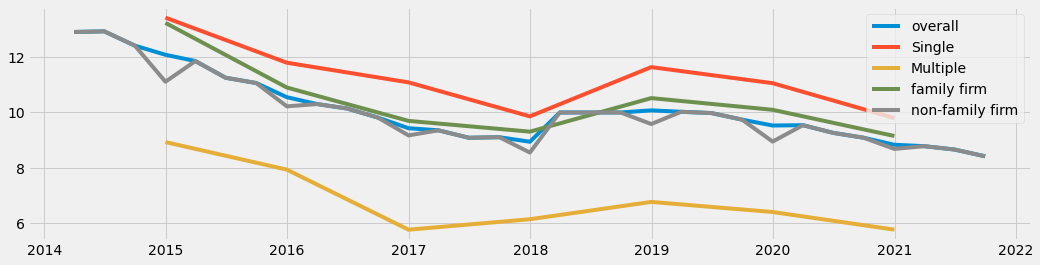

In [249]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(FApledge0_df.index, FApledge0_df['pledge_ratio'],label='overall')
ax.plot(FApledge1_df.index, FApledge1_df['pledge_ratio'],label='Single')
ax.plot(FApledge2_df.index, FApledge2_df['pledge_ratio'],label='Multiple')
ax.plot(FApledge3_df.index, FApledge3_df['pledge_ratio'],label='family firm')
ax.plot(FApledge4_df.index, FApledge4_df['pledge_ratio'],label='non-family firm')
ax.plot
plt.legend()

In [250]:
FApledge5_df = FApledge_df.query('FamStyle == 1').groupby(by=['Accper','Stkcd']).mean()
FApledge5_df= FApledge5_df.reset_index(level=1)
FApledge5_df = FApledge5_df.groupby(by='Accper').mean()

In [251]:
FApledge6_df = FApledge_df.query('FamStyle == 2').groupby(by=['Accper','Stkcd']).mean()
FApledge6_df= FApledge6_df.reset_index(level=1)
FApledge6_df = FApledge6_df.groupby(by='Accper').mean()

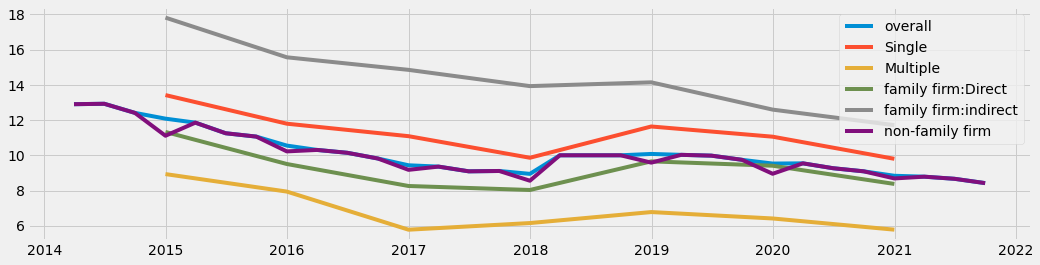

In [252]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(FApledge0_df.index, FApledge0_df['pledge_ratio'],label='overall')
ax.plot(FApledge1_df.index, FApledge1_df['pledge_ratio'],label='Single')
ax.plot(FApledge2_df.index, FApledge2_df['pledge_ratio'],label='Multiple')
ax.plot(FApledge5_df.index, FApledge5_df['pledge_ratio'],label='family firm:Direct')
ax.plot(FApledge6_df.index, FApledge6_df['pledge_ratio'],label='family firm:indirect')
ax.plot(FApledge4_df.index, FApledge4_df['pledge_ratio'],label='non-family firm')
ax.plot
plt.legend()

## 中国A股股权质押信息

1. 当is_discharge（是否解押）为1或者s_discharge_date（解押日期）不为空，两者满足其中一个条件即为已经解押；
2. 股票是否已经解押以上市公司实际披露的解押公告为准。目前该表没有字段记录质押警戒线、平仓相关信息；
3. 质押的股票若期间发生分红送转，到实际解押时会更新成转增后数量

| 主键 | 字段中文名              | 字段名                    | 字段类型   | 释义                        |
| ---- | ---------------------------- | ---------------------------- | -------------- | ----------------------------- |
|      | 对象ID                     | OBJECT_ID                    | VARCHAR2(100)  |                               |
|      | Wind代码                   | S_INFO_WINDCODE              | VARCHAR2(40)   |                               |
|      | 公告日期                 | ANN_DT                       | VARCHAR2(8)    |                               |
|      | 质押起始时间           | S_PLEDGE_BGDATE              | VARCHAR2(8)    |                               |
|      | 质押结束时间           | S_PLEDGE_ENDDATE             | VARCHAR2(8)    |                               |
|      | 股东名称                 | S_HOLDER_NAME                | VARCHAR2(200)  |                               |
|      | 质押数量(万股)         | S_PLEDGE_SHARES              | NUMBER(20,4)   |                               |
|      | 质押方                    | S_PLEDGOR                    | VARCHAR2(200)  |                               |
|      | 解押日期                 | S_DISCHARGE_DATE             | VARCHAR2(8)    |                               |
|      | 备注                       | S_REMARK                     | VARCHAR2(2000) |                               |
|      | 是否解押                 | IS_DISCHARGE                 | NUMBER(1,0)    |                               |
|      | 股东类型代码           | S_HOLDER_TYPE_CODE           | NUMBER(9,0)    | 113002000 公司 113003000 个人 |
|      | 股东ID                     | S_HOLDER_ID                  | VARCHAR2(10)   |                               |
|      | 质押方类型代码        | S_PLEDGOR_TYPE_CODE          | NUMBER(9,0)    |                               |
|      | 质押方ID                  | S_PLEDGOR_ID                 | VARCHAR2(10)   |                               |
|      | 股份性质类别代码     | S_SHR_CATEGORY_CODE          | NUMBER(9,0)    |                               |
|      | 持股总数                 | S_TOTAL_HOLDING_SHR          | NUMBER(20,4)   |                               |
|      | 累计质押股数           | S_TOTAL_PLEDGE_SHR           | NUMBER(20,4)   |                               |
|      | 本次质押股数占公司总股本比例 | S_PLEDGE_SHR_RATIO           | NUMBER(20,4)   |                               |
|      | 持股总数占公司总股本比例 | S_TOTAL_HOLDING_SHR_RATIO    | NUMBER(20,4)   |                               |
|      | 是否股权质押回购     | IS_EQUITY_PLEDGE_REPO        | NUMBER(1,0)    |                               |
|      | 本次质押股数占其所持股份比例 | S_PLEDGE_HOLDING_SHR_RATIO   | NUMBER(20,4)   |                               |
|      | 累计质押股数占其所持股份比例 | S_TOTAL_PLEDGE_HOLDSHR_RATIO | NUMBER(20,4)   |                               |
|      | 累计质押股数占公司总股本比例 | S_TOTAL_PLEDGE_SHR_RATIO     | NUMBER(20,4)   |                               |

In [165]:
query = "SELECT * FROM FILESYNC.AShareEquityPledgeInfo"
AShareEquityPledgeInfo_df = pd.read_sql(query,eng)

In [166]:
AShareEquityPledgeInfo_df.drop(columns=['object_id', 'opdate', 's_holder_name', 's_pledgor', 's_remark', 'opmode'], inplace=True)
AShareEquityPledgeInfo_df.sort_values(by=['ann_dt', 's_info_windcode'],inplace=True)
AShareEquityPledgeInfo_df.reset_index(drop=True, inplace=True)
AShareEquityPledgeInfo_df

,s_info_windcode,ann_dt,s_pledge_bgdate,s_pledge_enddate,s_pledge_shares,s_discharge_date,is_discharge,s_holder_type_code,s_holder_id,s_pledgor_type_code,s_pledgor_id,s_shr_category_code,s_total_holding_shr,s_total_pledge_shr,s_pledge_shr_ratio,s_total_holding_shr_ratio,is_equity_pledge_repo
0,000033.SZ,20030610,20030605,20040605,5512.5000,None,NaN,113002000,2010055,113002000.0,2002174,NaN,NaN,NaN,NaN,NaN,NaN
1,600745.SH,20041127,20040528,20041128,1590.0000,20041128,NaN,113002000,600740,113002000.0,2002178,NaN,NaN,NaN,NaN,NaN,0.0
2,000688.SZ,20050106,20021226,20031226,2188.0000,20041220,NaN,113002000,1HT2B9708D,113002000.0,2002175,NaN,NaN,NaN,NaN,NaN,NaN
3,600687.SH,20050112,20031121,20051120,2910.5414,20050105,1.0,113002000,0SI3E35FC4,113002000.0,1600000,NaN,NaN,NaN,NaN,NaN,0.0
4,600672.SH,20050115,20021111,20030211,3300.0000,20050112,NaN,113002000,D2F84A,113002000.0,2024267,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,600243.SH,20211130,20211126,20220525,1935.0000,None,0.0,113002000,yjfsHfeOCD,113002000.0,Or2h8tUeGU,460005000.0,4762.0000,3835.0,4.41,10.85,0.0
74997,600971.SH,20211130,20211125,20221125,18000.0000,None,0.0,113002000,0y94C95630,113002000.0,4W286A9DDA,460005000.0,65953.8889,32950.0,15.00,54.96,0.0
74998,601933.SH,20211130,20211129,20230524,18000.0000,None,0.0,113003000,None,113002000.0,2002191,460005000.0,106172.4522,55752.0,1.98,11.70,0.0
74999,603306.SH,20211130,20210331,20220331,208.0000,None,0.0,113003000,3C5BB8,113002000.0,04P59F85E8,460005000.0,2460.9700,208.0,0.68,8.02,1.0


In [159]:
AShareEquityPledgeInfo_df

,s_info_windcode,ann_dt,s_pledge_bgdate,s_pledge_enddate,s_pledge_shares,s_discharge_date,is_discharge,s_holder_type_code,s_holder_id,s_pledgor_type_code,s_pledgor_id,s_shr_category_code,s_total_holding_shr,s_total_pledge_shr,s_pledge_shr_ratio,s_total_holding_shr_ratio,is_equity_pledge_repo
0,000033.SZ,2003-06-10,20030605,20040605,5512.5000,None,NaN,113002000,2010055,113002000.0,2002174,NaN,NaN,NaN,NaN,NaN,NaN
1,600745.SH,2004-11-27,20040528,20041128,1590.0000,20041128,NaN,113002000,600740,113002000.0,2002178,NaN,NaN,NaN,NaN,NaN,0.0
2,000688.SZ,2005-01-06,20021226,20031226,2188.0000,20041220,NaN,113002000,1HT2B9708D,113002000.0,2002175,NaN,NaN,NaN,NaN,NaN,NaN
3,600687.SH,2005-01-12,20031121,20051120,2910.5414,20050105,1.0,113002000,0SI3E35FC4,113002000.0,1600000,NaN,NaN,NaN,NaN,NaN,0.0
4,600672.SH,2005-01-15,20021111,20030211,3300.0000,20050112,NaN,113002000,D2F84A,113002000.0,2024267,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,600243.SH,2021-11-30,20211126,20220525,1935.0000,None,0.0,113002000,yjfsHfeOCD,113002000.0,Or2h8tUeGU,460005000.0,4762.0000,3835.0,4.41,10.85,0.0
74997,600971.SH,2021-11-30,20211125,20221125,18000.0000,None,0.0,113002000,0y94C95630,113002000.0,4W286A9DDA,460005000.0,65953.8889,32950.0,15.00,54.96,0.0
74998,601933.SH,2021-11-30,20211129,20230524,18000.0000,None,0.0,113003000,None,113002000.0,2002191,460005000.0,106172.4522,55752.0,1.98,11.70,0.0
74999,603306.SH,2021-11-30,20210331,20220331,208.0000,None,0.0,113003000,3C5BB8,113002000.0,04P59F85E8,460005000.0,2460.9700,208.0,0.68,8.02,1.0


In [161]:
AShareEquityPledgeInfo_df['ann_dt'] = str(AShareEquityPledgeInfo_df['ann_dt'])

In [89]:
AShareEquityPledgeInfo_df['ann_dt'] = pd.to_datetime(AShareEquityPledgeInfo_df['ann_dt'])
AShareEquityPledgeInfo_df['count'] = 1
AShareEquityPledgeInfomean_df = AShareEquityPledgeInfo_df.groupby(by='ann_dt').sum().rolling(5).mean()

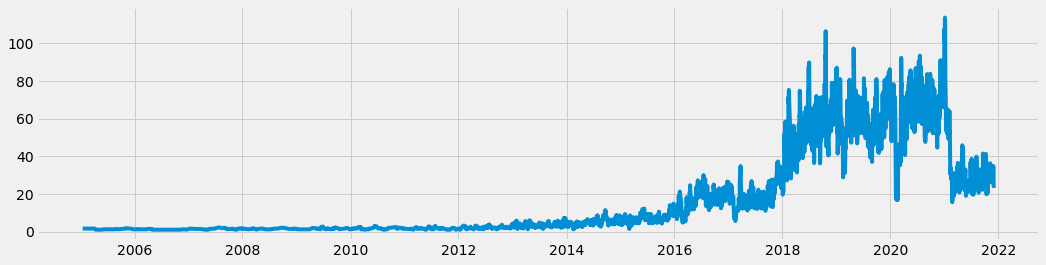

In [90]:
# 质押次数
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(AShareEquityPledgeInfomean_df.index, AShareEquityPledgeInfomean_df['count'])

2018 不断变更，不断调节质押

## 股东股权质押情况明细表 Pled_TrdDetl

In [72]:
PLED_TrdDetl = pd.read_csv('../PLED_TRDDETL.csv')
PLED_TrdDetl.rename(columns={'Symbol':'Stkcd'},inplace=True)
PLED_TrdDetl.sort_values(by='DeclareDate', inplace=True)
PLED_TrdDetl.reset_index(drop=True, inplace=True)
PLED_TrdDetl['DeclareDate'] = pd.to_datetime(PLED_TrdDetl['DeclareDate'])

In [73]:
PLED_TrdDetl['count'] = 1
PLED_TrdDetlcount = PLED_TrdDetl.groupby(by='DeclareDate').sum().rolling(5).mean()
PLED_TrdDetlcount

,EventID,EventSeq,Stkcd,InstitutionID,PledgorID,PledgorTypeCode,HoldRanking,PledgeeID,PledgeeCatergoryCode,PledTerm,InvestProjectCode,NumBeforeChg,ChangeNum,NumAfterChg,NumHolderOwn,Ratio1,TotNumShares,Ratio2,ClosePrice,Amount,JointPledgeSeq,count
DeclareDate,,,,,,,,,,,,,,,,,,,,,,
1998-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-16,7.307990e+11,1.6,120740.2,145594.8,6262179.6,3.8,1.4,10359853.6,4.8,0.000,1.4,6338182.0,39510225.6,45848407.6,0.000000e+00,0.000,3.834678e+08,20.824,20.286,0.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-12,1.169325e+13,52.8,10732695.4,121142193.0,407085900.8,79.6,35.2,141020405.4,118.2,24.684,25.4,502887611.2,174881198.0,677768809.2,8.221092e+09,301.574,3.113624e+10,53.086,543.566,0.0,426.4,22.4
2021-06-16,9.605169e+12,42.6,9395908.4,80289617.2,315395822.8,63.6,33.6,126675580.8,89.4,20.756,21.2,396843524.8,235858174.6,632701699.4,7.123629e+09,273.392,2.802772e+10,44.630,458.312,0.0,0.0,18.4
2021-06-17,8.456724e+12,37.2,9628298.0,74025376.2,282878433.8,54.8,29.8,118139914.0,64.6,18.570,19.2,445383936.2,-3671205.0,441712731.2,4.750971e+09,230.932,2.215802e+10,34.894,335.152,18880.0,0.0,16.2


In [81]:
PLED_TrdDetlcount = PLED_TrdDetl.groupby(by='DeclareDate').count().rolling(22).mean()

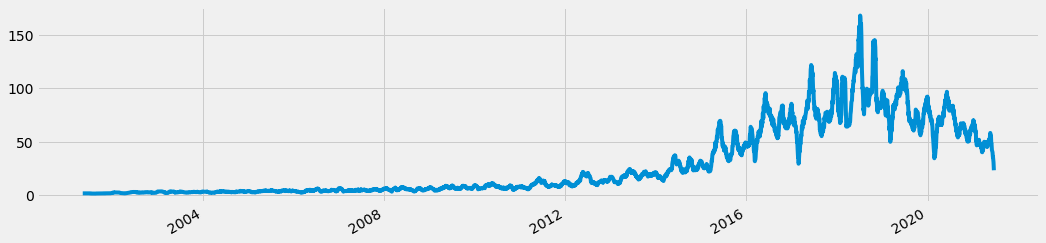

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.plot(PLED_TrdDetlcount.index, PLED_TrdDetlcount['count'])
fig.autofmt_xdate()

## 股东股权质押统计表 Pled_TrdStat

In [183]:
PLED_TrdStat = pd.read_csv('../PLED_TRDSTAT.csv')
PLED_TrdStat.rename(columns={'Symbol':'Stkcd'},inplace=True)
PLED_TrdStat.sort_values(by='ChangeDate', inplace=True)
PLED_TrdStat.reset_index(drop=True, inplace=True)

In [184]:
PLED_TrdStat.drop(columns=['InstitutionName', 'Pledgor', 'PledgorType', 'RelationtoCom', 'ChangeReason'], inplace=True)

In [185]:
PLED_TrdStat['pledge_ratio'] = PLED_TrdStat['NumHolderOwn']/PLED_TrdStat['TotNumShares']

In [127]:
PLED_TrdStat.drop(columns=['ClosePrice'],inplace=True)

,Stkcd,InstitutionID,ShortName,DeclareDate,PledgorID,PledgorTypeCode,RelationtoComCode,PledgeeNum,Pledtimes,AvgPledTerm1,AvgPledTerm2,ChangeDate,ChangeReasonCode,ChangeNum,NumHolderOwn,TotNumShares,ClosePrice,IsLastestRecord,pledge_ratio
0,600805,106219,江苏悦达,NaN,107910,2,1,1.0,1.0,NaN,NaN,1997-08-21,10,31690910,NaN,1.992400e+08,11.62,N,NaN
1,600805,106219,江苏悦达,1998-05-06,107910,2,1,1.0,1.0,NaN,NaN,1998-05-12,01,25352728,NaN,4.654452e+08,7.42,N,NaN
2,603,107558,威达医械,1999-09-02,107558,2,1,1.0,1.0,NaN,NaN,1999-01-31,10,12500000,NaN,1.118625e+08,9.23,N,NaN
3,600182,105133,桦林轮胎,2003-12-23,10364431,2,1,1.0,1.0,2.99,2.99,1999-08-24,10,151070000,NaN,3.400000e+08,6.22,N,NaN
4,603,107558,威达医械,1999-09-02,107558,2,1,2.0,2.0,NaN,NaN,1999-09-02,10,44500000,NaN,1.118625e+08,10.13,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119738,600603,106284,广汇物流,2021-06-19,105477,3,"1,6",3.0,5.0,0.77,0.87,2021-06-17,10,8500000,5.734671e+08,1.257027e+09,4.07,Y,0.456209
119739,601236,1085,红塔证券,2021-06-19,107041,2,4,3.0,3.0,0.73,0.73,2021-06-17,20,-11774380,6.540430e+08,3.633405e+09,12.52,Y,0.180008
119740,600466,107604,蓝光发展,2021-06-19,10144573,3,"1,6",8.0,12.0,0.66,0.72,2021-06-17,10,77630000,1.769642e+09,3.034930e+09,3.04,Y,0.583092
119741,600903,10120694,贵州燃气,2021-06-19,10108786,2,4,3.0,3.0,1.27,1.30,2021-06-17,21,-48000000,4.090946e+08,1.138185e+09,9.16,Y,0.359427


In [186]:
PLED_TrdStat

,Stkcd,InstitutionID,ShortName,DeclareDate,PledgorID,PledgorTypeCode,RelationtoComCode,PledgeeNum,Pledtimes,AvgPledTerm1,AvgPledTerm2,ChangeDate,ChangeReasonCode,ChangeNum,NumHolderOwn,TotNumShares,ClosePrice,IsLastestRecord,pledge_ratio
0,600805,106219,江苏悦达,NaN,107910,2,1,1.0,1.0,NaN,NaN,1997-08-21,10,31690910,NaN,1.992400e+08,11.62,N,NaN
1,600805,106219,江苏悦达,1998-05-06,107910,2,1,1.0,1.0,NaN,NaN,1998-05-12,01,25352728,NaN,4.654452e+08,7.42,N,NaN
2,603,107558,威达医械,1999-09-02,107558,2,1,1.0,1.0,NaN,NaN,1999-01-31,10,12500000,NaN,1.118625e+08,9.23,N,NaN
3,600182,105133,桦林轮胎,2003-12-23,10364431,2,1,1.0,1.0,2.99,2.99,1999-08-24,10,151070000,NaN,3.400000e+08,6.22,N,NaN
4,603,107558,威达医械,1999-09-02,107558,2,1,2.0,2.0,NaN,NaN,1999-09-02,10,44500000,NaN,1.118625e+08,10.13,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119738,600603,106284,广汇物流,2021-06-19,105477,3,"1,6",3.0,5.0,0.77,0.87,2021-06-17,10,8500000,5.734671e+08,1.257027e+09,4.07,Y,0.456209
119739,601236,1085,红塔证券,2021-06-19,107041,2,4,3.0,3.0,0.73,0.73,2021-06-17,20,-11774380,6.540430e+08,3.633405e+09,12.52,Y,0.180008
119740,600466,107604,蓝光发展,2021-06-19,10144573,3,"1,6",8.0,12.0,0.66,0.72,2021-06-17,10,77630000,1.769642e+09,3.034930e+09,3.04,Y,0.583092
119741,600903,10120694,贵州燃气,2021-06-19,10108786,2,4,3.0,3.0,1.27,1.30,2021-06-17,21,-48000000,4.090946e+08,1.138185e+09,9.16,Y,0.359427
